In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [3]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20200101", "00_Cumulative_water_vapor_amount.parquet.gzip")

data = pd.read_parquet(datafile_path)

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,0.812826,0.811860,0.810886,0.809902,0.808910,0.807909,0.806901,0.805885,0.804863,0.803833,...,0.821888,0.821036,0.820170,0.819293,0.818402,0.817501,0.816587,0.815663,0.814727,0.813782
-88.3125,0.876859,0.874370,0.871901,0.869606,0.867266,0.864880,0.862450,0.859977,0.857462,0.854906,...,0.907012,0.903905,0.900749,0.897545,0.894294,0.890998,0.887657,0.884274,0.881679,0.879296
-87.1875,0.956582,0.952462,0.948285,0.944051,0.939762,0.936208,0.933803,0.931314,0.928743,0.926090,...,1.002686,0.997366,0.991939,0.986407,0.980771,0.976253,0.972447,0.968576,0.964640,0.960641
-86.0625,1.038138,1.033569,1.028878,1.024068,1.019139,1.014095,1.009518,1.006162,1.002714,1.001379,...,1.097215,1.083922,1.075977,1.067940,1.062900,1.059097,1.055162,1.051097,1.046903,1.042583
-84.9375,1.128004,1.122991,1.123434,1.123670,1.123697,1.123517,1.123129,1.122533,1.121729,1.120719,...,1.244424,1.232399,1.220134,1.207634,1.194904,1.181948,1.168771,1.155378,1.141775,1.134215


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


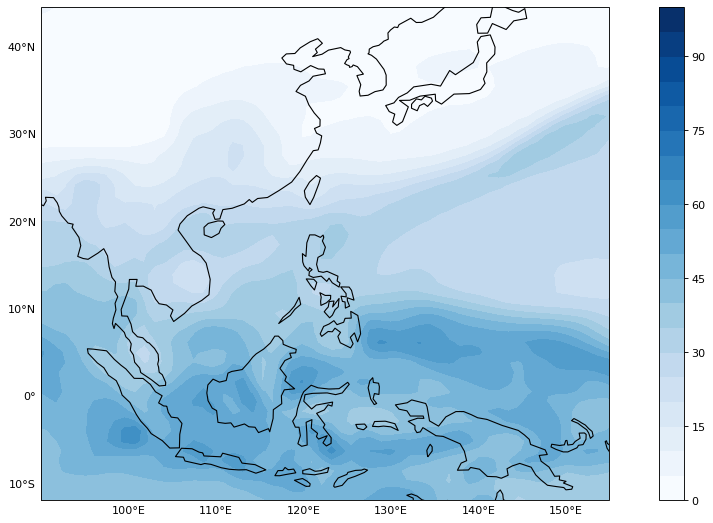

In [12]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = [i for i in range(0, 101, 5)]
cmap = cm.Blues
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("Cumulative water vapor amount (kg/m^2)")

plt.show()
plt.close()

In [5]:
data

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,0.812826,0.811860,0.810886,0.809902,0.808910,0.807909,0.806901,0.805885,0.804863,0.803833,...,0.821888,0.821036,0.820170,0.819293,0.818402,0.817501,0.816587,0.815663,0.814727,0.813782
-88.3125,0.876859,0.874370,0.871901,0.869606,0.867266,0.864880,0.862450,0.859977,0.857462,0.854906,...,0.907012,0.903905,0.900749,0.897545,0.894294,0.890998,0.887657,0.884274,0.881679,0.879296
-87.1875,0.956582,0.952462,0.948285,0.944051,0.939762,0.936208,0.933803,0.931314,0.928743,0.926090,...,1.002686,0.997366,0.991939,0.986407,0.980771,0.976253,0.972447,0.968576,0.964640,0.960641
-86.0625,1.038138,1.033569,1.028878,1.024068,1.019139,1.014095,1.009518,1.006162,1.002714,1.001379,...,1.097215,1.083922,1.075977,1.067940,1.062900,1.059097,1.055162,1.051097,1.046903,1.042583
-84.9375,1.128004,1.122991,1.123434,1.123670,1.123697,1.123517,1.123129,1.122533,1.121729,1.120719,...,1.244424,1.232399,1.220134,1.207634,1.194904,1.181948,1.168771,1.155378,1.141775,1.134215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.9375,1.940259,1.962663,1.984857,2.006830,2.028576,2.050085,2.071699,2.094533,2.117162,2.139576,...,1.504292,1.547129,1.590013,1.632926,1.678317,1.724209,1.769980,1.815614,1.861092,1.906397
86.0625,1.903667,1.919344,1.935011,1.950664,1.965775,1.978312,1.990713,2.002971,2.015082,2.027042,...,1.578995,1.610387,1.641989,1.673790,1.705775,1.737935,1.772575,1.807757,1.842971,1.878206
87.1875,1.944561,1.945511,1.946314,1.946971,1.947481,1.947843,1.948058,1.948126,1.948047,1.947820,...,1.755701,1.774661,1.793839,1.813228,1.832821,1.852610,1.872587,1.892745,1.913076,1.933573
88.3125,1.946939,1.940483,1.933990,1.927462,1.920901,1.914310,1.907691,1.901048,1.894381,1.887695,...,1.909883,1.914256,1.918603,1.922920,1.927206,1.931459,1.935678,1.939861,1.944007,1.948113
